In [1]:
import datetime
print("latest edit:",datetime.datetime.now())

latest edit: 2025-07-20 18:21:58.751260


Get the data

Food-101-dataset

a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

In [2]:
# !pip install wget


In [ ]:
# import wget
# import zipfile

# # Download the zip file using Python wget
# url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
# wget.download(url, "pizza_steak.zip")  # this saves the file

# # Unzip the downloaded file
# with zipfile.ZipFile("pizza_steak.zip", "r") as zip_ref:
#     zip_ref.extractall()


Inspect the data

* A train directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
* A test directory with the same structure as the train directory.

Let's inspect each of the directories we've downloaded.

To so do, we can use the command ls which stands for list.


In [7]:
!dir pizza_steak

 Volume in drive D is New Volume
 Volume Serial Number is F40B-D59C

 Directory of d:\Data Science\TensorFlow-for-Deep-Learning\Computer Vision\pizza_steak

20-07-2025  18:23    <DIR>          .
20-07-2025  18:23    <DIR>          ..
20-07-2025  18:23    <DIR>          test
20-07-2025  18:23    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  321,750,663,168 bytes free


In [10]:
!dir pizza_steak\train\

 Volume in drive D is New Volume
 Volume Serial Number is F40B-D59C

 Directory of d:\Data Science\TensorFlow-for-Deep-Learning\Computer Vision\pizza_steak\train

20-07-2025  18:23    <DIR>          .
20-07-2025  18:23    <DIR>          ..
20-07-2025  18:23    <DIR>          pizza
20-07-2025  18:23    <DIR>          steak
               0 File(s)              0 bytes
               4 Dir(s)  321,750,663,168 bytes free


In [11]:
!dir pizza_steak\test

 Volume in drive D is New Volume
 Volume Serial Number is F40B-D59C

 Directory of d:\Data Science\TensorFlow-for-Deep-Learning\Computer Vision\pizza_steak\test

20-07-2025  18:23    <DIR>          .
20-07-2025  18:23    <DIR>          ..
20-07-2025  18:23    <DIR>          pizza
20-07-2025  18:23    <DIR>          steak
               0 File(s)              0 bytes
               4 Dir(s)  321,750,663,168 bytes free


In [12]:
!dir pizza_steak\test\steak

 Volume in drive D is New Volume
 Volume Serial Number is F40B-D59C

 Directory of d:\Data Science\TensorFlow-for-Deep-Learning\Computer Vision\pizza_steak\test\steak

20-07-2025  18:23    <DIR>          .
20-07-2025  18:23    <DIR>          ..
20-07-2025  18:23            49,452 100274.jpg
20-07-2025  18:23            68,761 1012080.jpg
20-07-2025  18:23            84,650 1016217.jpg
20-07-2025  18:23            54,239 1064847.jpg
20-07-2025  18:23            69,069 1082384.jpg
20-07-2025  18:23            35,181 108310.jpg
20-07-2025  18:23            43,561 1094883.jpg
20-07-2025  18:23            48,923 1107549.jpg
20-07-2025  18:23            33,209 1118585.jpg
20-07-2025  18:23            57,498 1163050.jpg
20-07-2025  18:23           116,242 1166047.jpg
20-07-2025  18:23            52,966 1190808.jpg
20-07-2025  18:23            23,999 1194662.jpg
20-07-2025  18:23            71,660 1206166.jpg
20-07-2025  18:23            44,133 1225389.jpg
20-07-2025  18:23            48,308 1

In [15]:
import os

# Use raw string (r"...") or forward slashes
num_steak_images_train = len(os.listdir(r"pizza_steak/train/steak"))
print("Number of steak images in training set:", num_steak_images_train)


Number of steak images in training set: 750


In [19]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [29]:
# view an image 

import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    """
    Displays a random image from a target directory and class.
    
    Args:
    target_dir (str): Path to the target directory.
    target_class (str): Name of the target class.
    """
    target_folder = os.path.join(target_dir, target_class)
    random_image = random.choice(os.listdir(target_folder))
    img = mpimg.imread(os.path.join(target_folder, random_image))
    
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    plt.show()
    return img


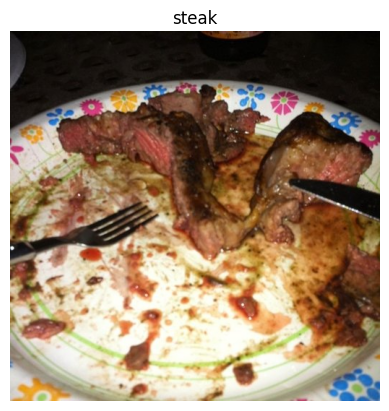

In [30]:
img=view_random_image("pizza_steak/train", "steak")

In [32]:
img

array([[[ 16,  15,  13],
        [ 11,  10,   8],
        [  5,   4,   2],
        ...,
        [  6,   4,   5],
        [  6,   4,   5],
        [  5,   3,   4]],

       [[ 22,  21,  19],
        [ 18,  17,  15],
        [ 13,  12,  10],
        ...,
        [  6,   4,   5],
        [  6,   4,   5],
        [  5,   3,   4]],

       [[ 26,  25,  23],
        [ 25,  24,  22],
        [ 20,  19,  17],
        ...,
        [  6,   4,   5],
        [  5,   3,   4],
        [  4,   2,   3]],

       ...,

       [[208, 196, 184],
        [209, 193, 177],
        [210, 188, 165],
        ...,
        [ 57, 104, 156],
        [ 75, 119, 168],
        [ 91, 135, 182]],

       [[210, 195, 166],
        [208, 189, 157],
        [205, 180, 139],
        ...,
        [ 71, 113, 163],
        [ 90, 128, 175],
        [106, 144, 189]],

       [[210, 194, 158],
        [206, 187, 145],
        [201, 173, 125],
        ...,
        [ 83, 121, 170],
        [101, 138, 183],
        [119, 153, 198]]

In [34]:
img.shape # return width,height,channels

(512, 512, 3)

Looking at the image shape more closely, see it's in the form (Width, Height, Colour Channels).

In our case, the width and height vary but because we're dealing with colour images, the colour channels value is always 3. This is for different values of red, green and blue (RGB) pixels.

notice all of the values in the img array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value red=0, green=0, blue=255 will look very blue.

So when we build a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determine what each class looks like.

 As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

In [35]:
img/255.0

array([[[0.0627451 , 0.05882353, 0.05098039],
        [0.04313725, 0.03921569, 0.03137255],
        [0.01960784, 0.01568627, 0.00784314],
        ...,
        [0.02352941, 0.01568627, 0.01960784],
        [0.02352941, 0.01568627, 0.01960784],
        [0.01960784, 0.01176471, 0.01568627]],

       [[0.08627451, 0.08235294, 0.0745098 ],
        [0.07058824, 0.06666667, 0.05882353],
        [0.05098039, 0.04705882, 0.03921569],
        ...,
        [0.02352941, 0.01568627, 0.01960784],
        [0.02352941, 0.01568627, 0.01960784],
        [0.01960784, 0.01176471, 0.01568627]],

       [[0.10196078, 0.09803922, 0.09019608],
        [0.09803922, 0.09411765, 0.08627451],
        [0.07843137, 0.0745098 , 0.06666667],
        ...,
        [0.02352941, 0.01568627, 0.01960784],
        [0.01960784, 0.01176471, 0.01568627],
        [0.01568627, 0.00784314, 0.01176471]],

       ...,

       [[0.81568627, 0.76862745, 0.72156863],
        [0.81960784, 0.75686275, 0.69411765],
        [0.82352941, 0

Architecture of CNN

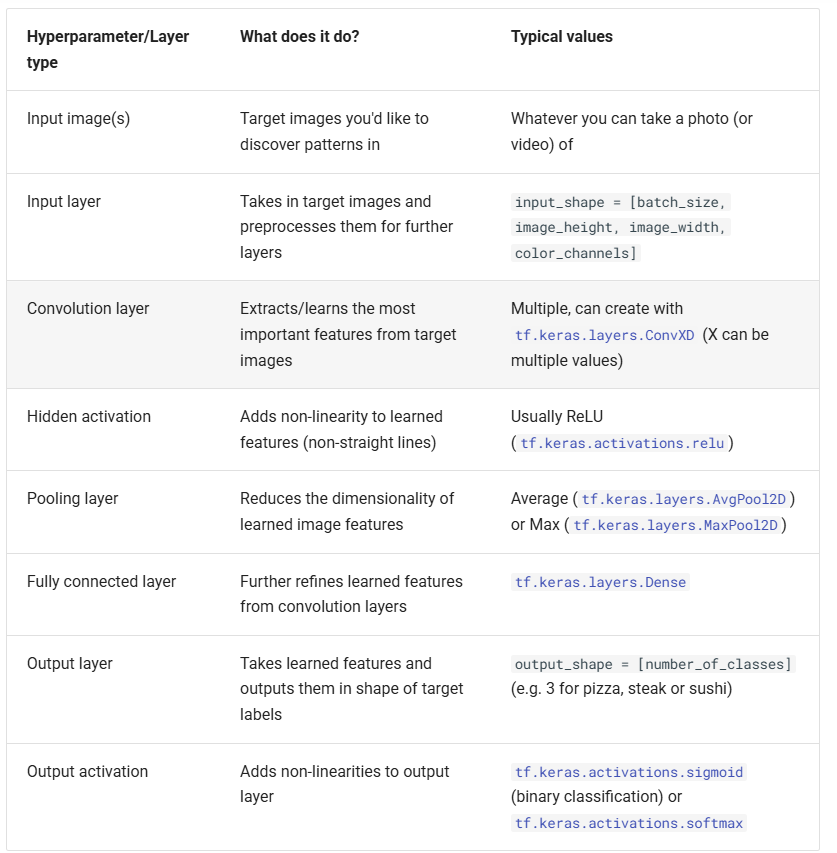

How the architecture looks like 

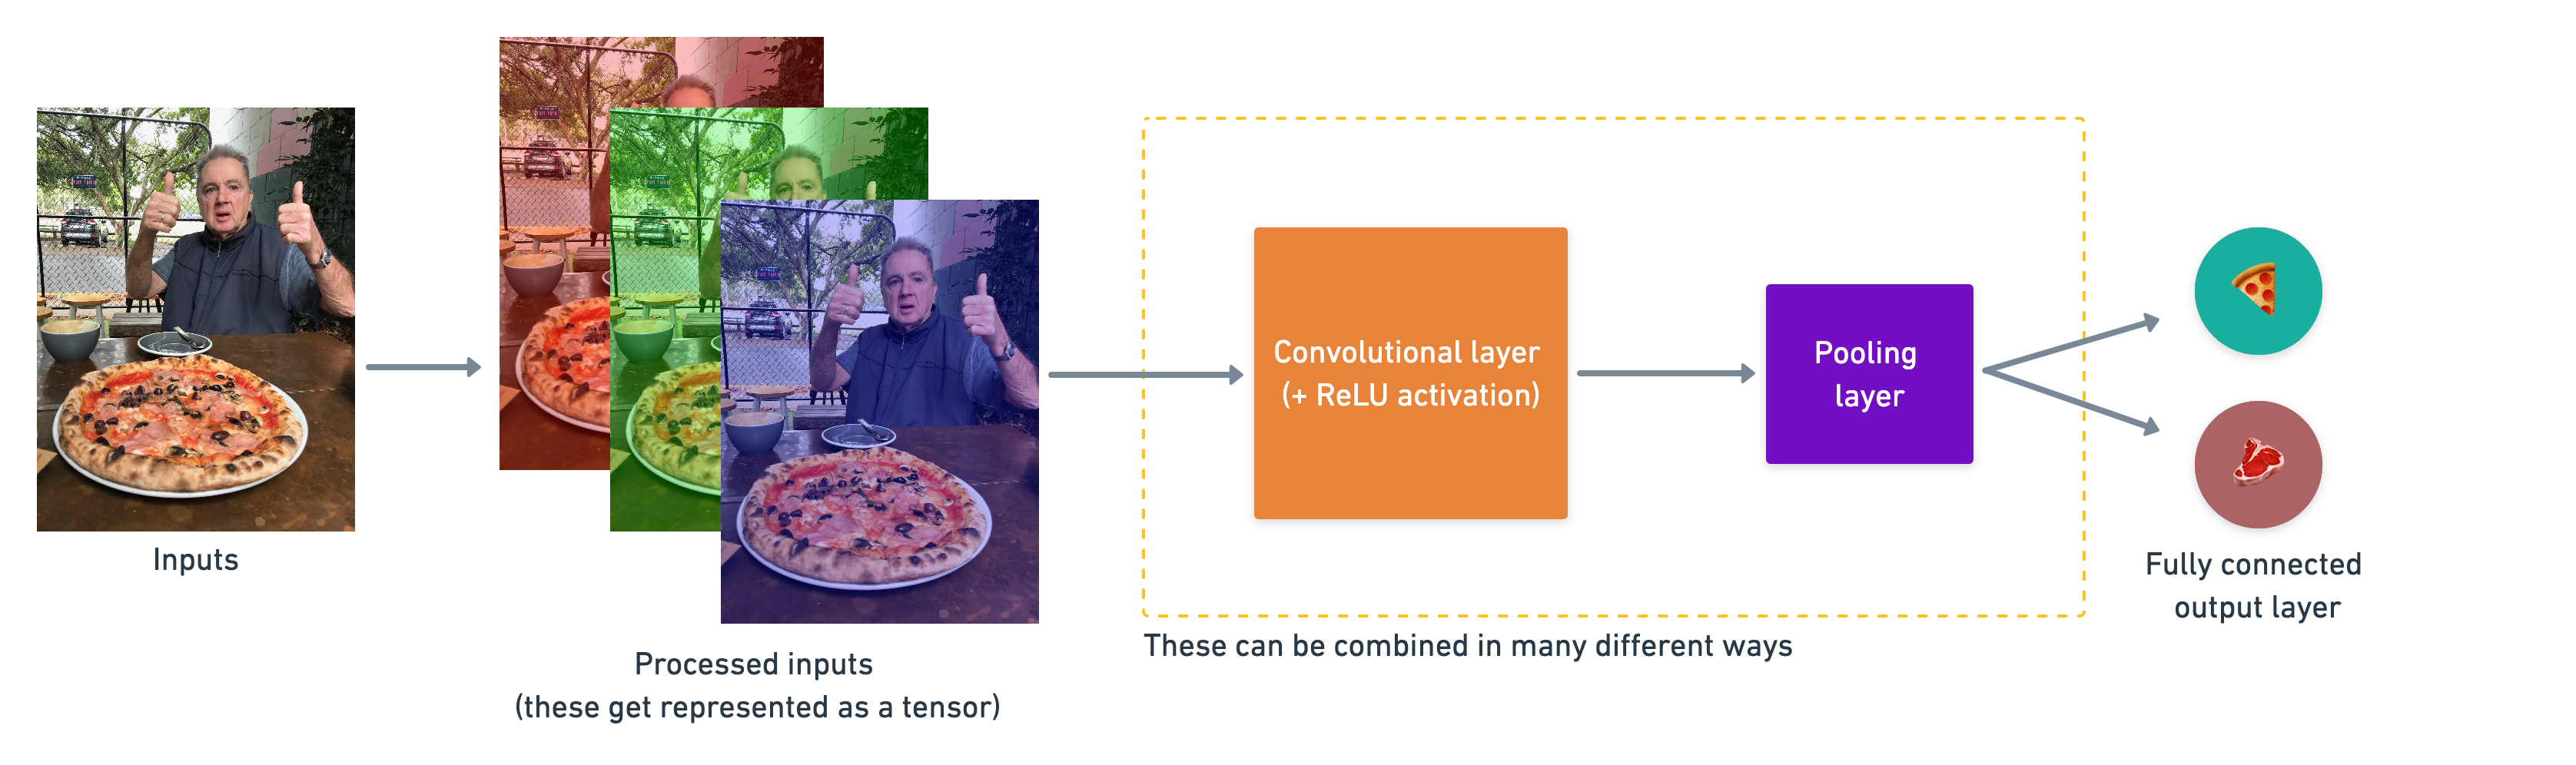